In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import *
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

In [3]:
def normalizeAB(a,b,x):
    minX=x.min()
    maxX=x.max()
    return (b-a)*((x-minX)/(maxX-minX))+a

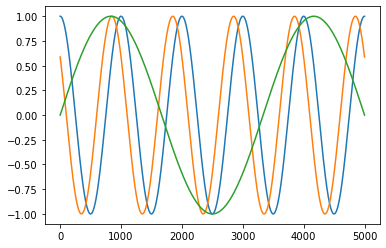

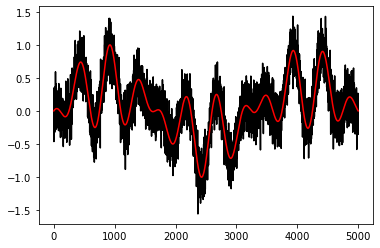

In [4]:
x=linspace(0,numpy.pi*10,5001)
A=numpy.cos(x)
B=numpy.cos(x+numpy.pi*0.3)
C=numpy.cos((x+numpy.pi*5)*0.3)
plot(A)
plot(B)
plot(C)
figure()
rawData=normalizeAB(-1,1,A*B*C)
noise=numpy.random.normal(0,0.2,5001)
data=rawData+noise
plot(data,'k')
plot(rawData,'r')

n = 2000
train_data=numpy.array(data[:-n])
test_data=numpy.array(data[-n:])
train_data_normalised=normalizeAB(-1.0,1.0,train_data)
test_data_normalised=normalizeAB(-1.0,1.0,test_data)

In [5]:
def create_train_test_dataset(dataset):
    train_set = dataset[:3000]
    test_set = dataset[3000:]
    return train_set,test_set

In [6]:
#RNN
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=32, output_size=1):
        super().__init__()
        self.hidden_layer_size=hidden_layer_size
        nr_of_layers_in_rnn=1
        self.rnn=nn.RNN(input_size,self.hidden_layer_size,nr_of_layers_in_rnn,batch_first=True, nonlinearity='tanh')
        self.linear = nn.Linear(hidden_layer_size,output_size)
        
    def forward(self,input_seq):
        h0= torch.zeros(1,1,self.hidden_layer_size)
        rnn_out,h0 = self.rnn(input_seq,h0)
        out=rnn_out.contiguous().view(-1,self.hidden_layer_size)
        out=self.linear(out)
        return out[-1]

In [7]:
#LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=32, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        h0 = (torch.zeros(1,1,self.hidden_layer_size), torch.zeros(1,1,self.hidden_layer_size))
        lstm_out, h0 = self.lstm(input_seq.view(len(input_seq) ,1, -1), h0)
        out = self.linear(lstm_out.view(len(input_seq), -1))
        return out[-1]

In [8]:
window_size = [3,30,100,300]
def create_new_datasets(data,window_size):
    new = list()
    for ws in window_size:
        new_set = list()
        for p in range(len(data)-ws):
            new_input = torch.Tensor(data[p:p+ws])
            new_output = torch.FloatTensor([data[p+ws]])
            new_set.append((new_input,new_output)) 
        new.append(new_set)
    return new
new_datasets = create_new_datasets(data.tolist(),window_size)
#new_test_datasets = create_new_datasets(test_data_normalised.tolist(),window_size)

***Model information for Window Size 3***
Train Epoch 1/30, loss:0.00010875
Test Epoch 1/30, loss:0.01272409
Train Epoch 2/30, loss:0.01017672
Test Epoch 2/30, loss:0.02941140
Train Epoch 3/30, loss:0.04018740
Test Epoch 3/30, loss:0.05433328
Train Epoch 4/30, loss:0.08514383
Test Epoch 4/30, loss:0.08556993
Train Epoch 5/30, loss:0.13032602
Test Epoch 5/30, loss:0.11639718
Train Epoch 6/30, loss:0.16409494
Test Epoch 6/30, loss:0.14024416
Train Epoch 7/30, loss:0.18479146
Test Epoch 7/30, loss:0.15544847
Train Epoch 8/30, loss:0.19598870
Test Epoch 8/30, loss:0.16391721
Train Epoch 9/30, loss:0.20152628
Test Epoch 9/30, loss:0.16818406
Train Epoch 10/30, loss:0.20400217
Test Epoch 10/30, loss:0.17011438
Train Epoch 11/30, loss:0.20490110
Test Epoch 11/30, loss:0.17082222
Train Epoch 12/30, loss:0.20501275
Test Epoch 12/30, loss:0.17091271
Train Epoch 13/30, loss:0.20473967
Test Epoch 13/30, loss:0.17069909
Train Epoch 14/30, loss:0.20428446
Test Epoch 14/30, loss:0.17033999
Train Epoc

C:\Anaconda\envs\MLLAB\lib\site-packages\numpy\core\shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
C:\Anaconda\envs\MLLAB\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


***Model information for Window Size 30***
Train Epoch 1/30, loss:0.00009672
Test Epoch 1/30, loss:0.00971429
Train Epoch 2/30, loss:0.00661938
Test Epoch 2/30, loss:0.03158125
Train Epoch 3/30, loss:0.02992100
Test Epoch 3/30, loss:0.07711610
Train Epoch 4/30, loss:0.05001096
Test Epoch 4/30, loss:0.13007693
Train Epoch 5/30, loss:0.05647836
Test Epoch 5/30, loss:0.15025546
Train Epoch 6/30, loss:0.05757337
Test Epoch 6/30, loss:0.15369453
Train Epoch 7/30, loss:0.05754897
Test Epoch 7/30, loss:0.15373875
Train Epoch 8/30, loss:0.05735730
Test Epoch 8/30, loss:0.15324737
Train Epoch 9/30, loss:0.05715280
Test Epoch 9/30, loss:0.15268327
Train Epoch 10/30, loss:0.05695769
Test Epoch 10/30, loss:0.15211873
Train Epoch 11/30, loss:0.05677486
Test Epoch 11/30, loss:0.15156326
Train Epoch 12/30, loss:0.05660327
Test Epoch 12/30, loss:0.15101816
Train Epoch 13/30, loss:0.05644249
Test Epoch 13/30, loss:0.15048243
Train Epoch 14/30, loss:0.05629161
Test Epoch 14/30, loss:0.14995652
Train Epo

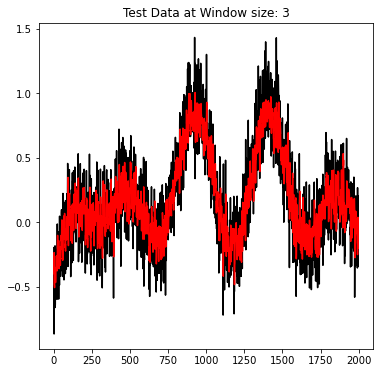

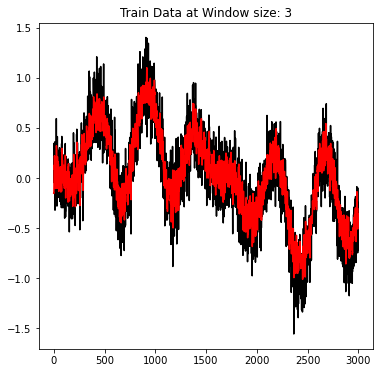

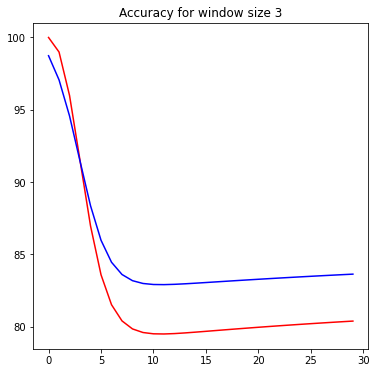

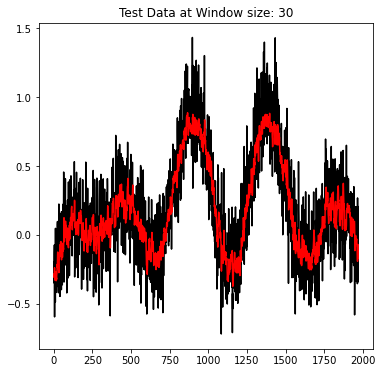

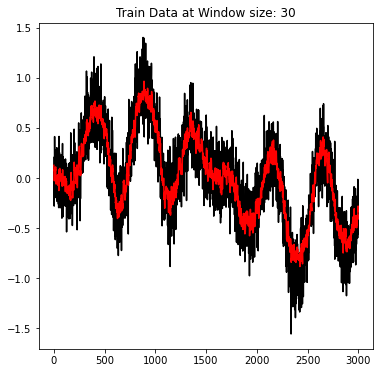

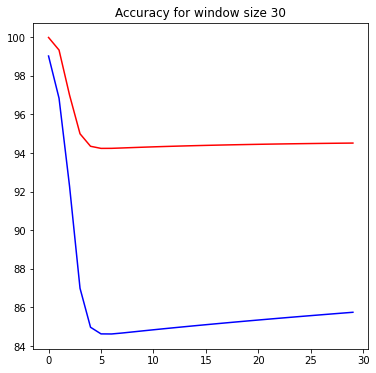

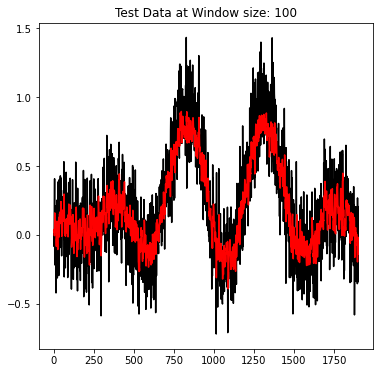

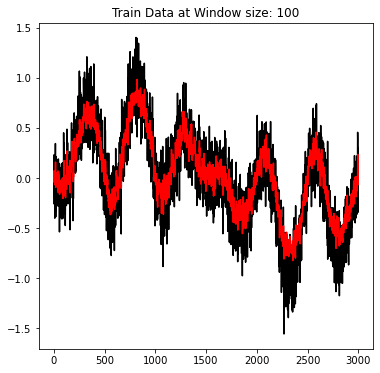

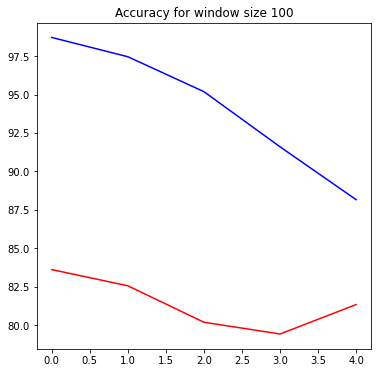

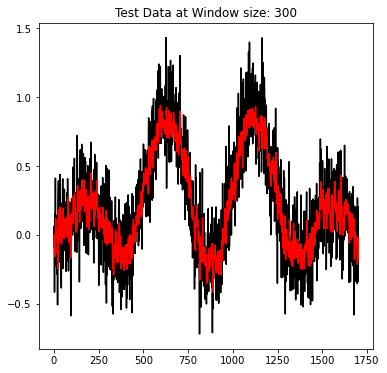

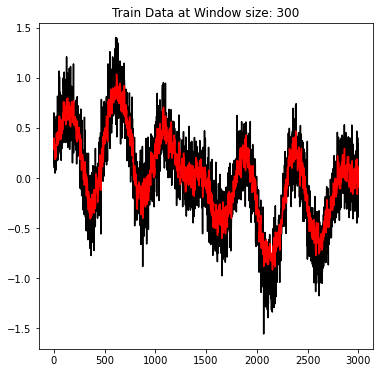

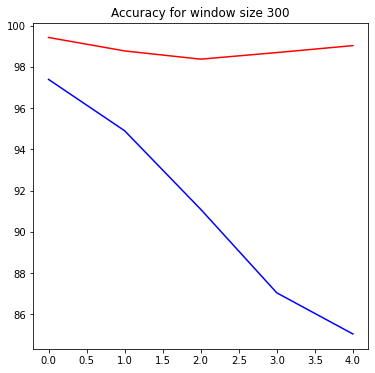

In [9]:
learning_rate = 0.0001
for input_data in new_datasets:
    train_accuracy = []
    test_accuracy = []
    train_data,test_data = create_train_test_dataset(input_data)
    ws = len(train_data[0][0])
    epochs = 5 if ws > 30 else 30
    print(f'***Model information for Window Size {ws}***')
    model=RNNModel()
    loss_function = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    out=model(train_data[0][0].reshape(1,ws,1))
    for i in range(epochs):
        cnt = 0 
        for x,y in train_data:
            cnt+=1
            optimizer.zero_grad()
            model.hidden_cell=(torch.zeros(1,1,model.hidden_layer_size), torch.zeros(1,1,model.hidden_layer_size))
            y_pred=model(x.reshape(1,ws,1))
            y_loss=loss_function(y_pred,y)
            y_loss.backward()
            optimizer.step()
        print(f'Train Epoch {i+1}/{epochs}, loss:{y_loss.item():10.8f}')
        accuracy = (1-y_loss.item())*100
        train_accuracy.append(accuracy)
        rnn_model = model
        for x,y in test_data:
            cnt+=1
            optimizer.zero_grad()
            model.hidden_cell=(torch.zeros(1,1,model.hidden_layer_size), torch.zeros(1,1,model.hidden_layer_size))
            y_pred=model(x.reshape(1,ws,1))
            y_loss=loss_function(y_pred,y)
            y_loss.backward()
            optimizer.step()
        print(f'Test Epoch {i+1}/{epochs}, loss:{y_loss.item():10.8f}')
        accuracy = (1-y_loss.item())*100
        test_accuracy.append(accuracy)
    #plot for test data
    result=[]
    expectation=[]
    for i in range(len(test_data)):
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size), torch.zeros(1, 1, model.hidden_layer_size))
        result.append(torch.Tensor(model(test_data[i][0].reshape(1,ws,1))).detach().numpy())
        expectation.append(test_data[i][1])
    figure(figsize=(6,6))
    plot(expectation,'k')
    plot(result,'r')
    title("Test Data at Window size: "+str(ws))
    #plot for train data
    result=[]
    expectation=[]
    for i in range(len(train_data)):
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size), torch.zeros(1, 1, model.hidden_layer_size))
        result.append(torch.Tensor(model(train_data[i][0].reshape(1,ws,1))).detach().numpy())
        expectation.append(train_data[i][1])
    figure(figsize=(6,6))
    plot(expectation,'k')
    plot(result,'r')
    title("Train Data at Window size: "+str(ws))
    #plot for Accuracies
    figure(figsize=(6,6))
    plot(range(epochs),train_accuracy,'r')
    plot(range(epochs),test_accuracy,'b')
    title("Accuracy for window size "+str(ws))

For RNN, I have trainded the models created with window size 3 and 30 with 30 epochs and 100 and 300 with 5 epochs as it consumes more time and memoryfor completeting the process and double time as we perform test as well. I have used Mean squared error as loss function and Stocastic Gradient Decent as optimizer. While comparing the performances, based on accuracy, for window size 100 the model is over fitting as the test accuracy is higher than train. Model with 30 window size has better accuracy of 94% compared to others.

***Model info for Window Size 3***
Train Epoch 1/30, loss:0.00064580
Test Epoch 1/30, loss:0.02934345
Train Epoch 2/30, loss:0.00564173
Test Epoch 2/30, loss:0.01990570
Train Epoch 3/30, loss:0.00622149
Test Epoch 3/30, loss:0.01913045
Train Epoch 4/30, loss:0.00484584
Test Epoch 4/30, loss:0.02053056
Train Epoch 5/30, loss:0.00316034
Test Epoch 5/30, loss:0.02269966
Train Epoch 6/30, loss:0.00168407
Test Epoch 6/30, loss:0.02529482
Train Epoch 7/30, loss:0.00060711
Test Epoch 7/30, loss:0.02825340
Train Epoch 8/30, loss:0.00005075
Test Epoch 8/30, loss:0.03159213
Train Epoch 9/30, loss:0.00013249
Test Epoch 9/30, loss:0.03534938
Train Epoch 10/30, loss:0.00097696
Test Epoch 10/30, loss:0.03956603
Train Epoch 11/30, loss:0.00271159
Test Epoch 11/30, loss:0.04427794
Train Epoch 12/30, loss:0.00545685
Test Epoch 12/30, loss:0.04951019
Train Epoch 13/30, loss:0.00931395
Test Epoch 13/30, loss:0.05527336
Train Epoch 14/30, loss:0.01435193
Test Epoch 14/30, loss:0.06155808
Train Epoch 15/30

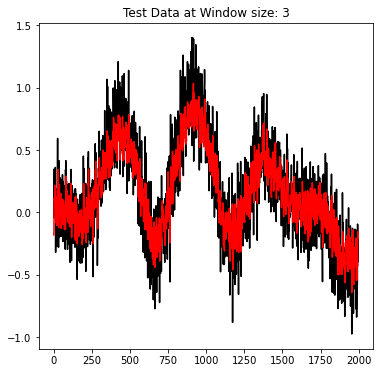

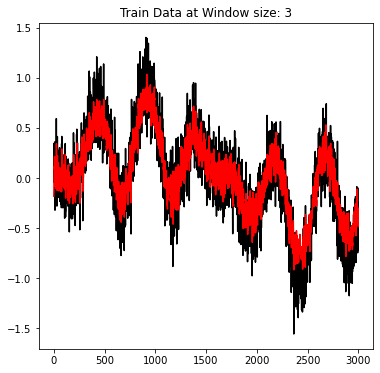

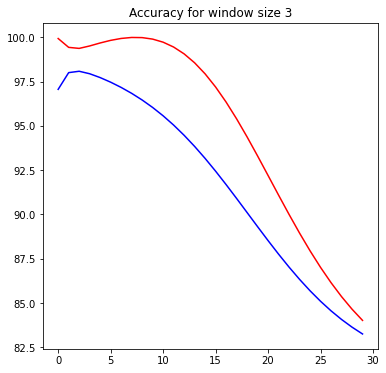

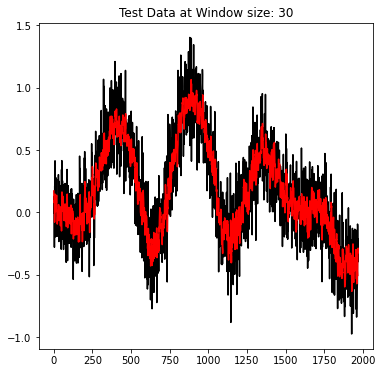

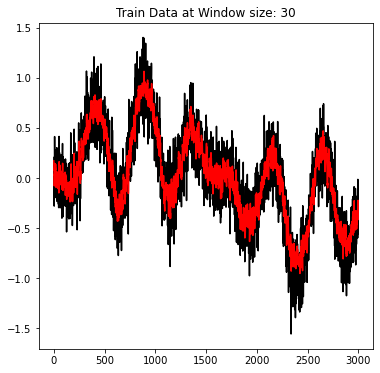

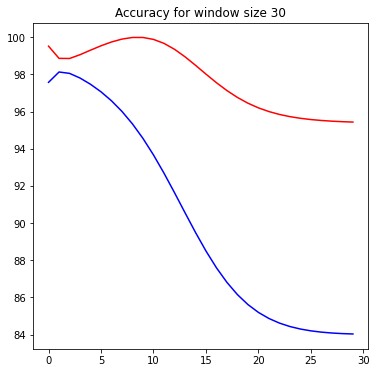

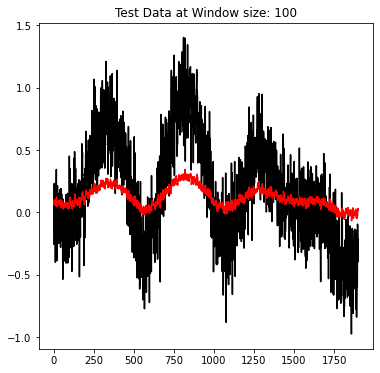

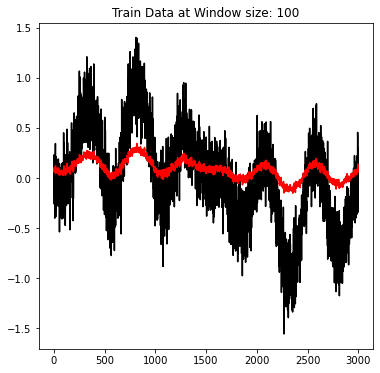

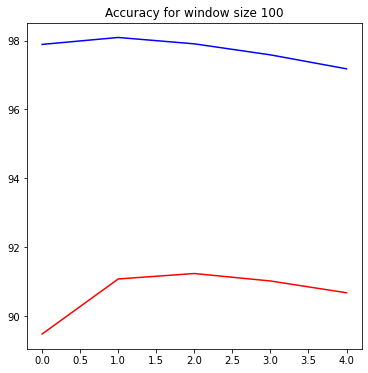

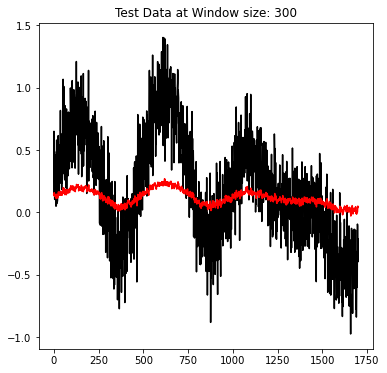

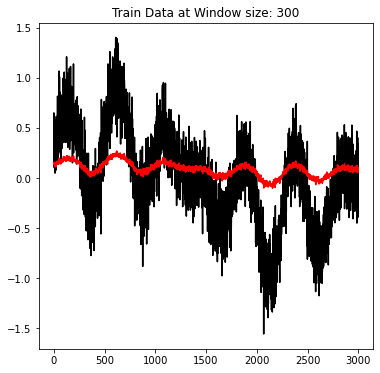

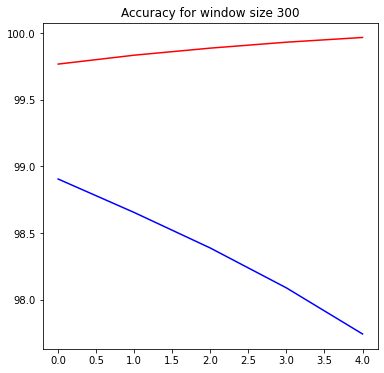

In [10]:
for input_data in new_datasets:
    train_accuracy = []
    test_accuracy = []
    train_data,test_data = create_train_test_dataset(input_data)
    ws = len(train_data[0][0])
    epochs = 5 if ws > 30 else 30
    print(f'***Model info for Window Size {ws}***')
    model=LSTMModel()
    loss_function = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    out=model(input_data[0][0].reshape(ws,1,1))
    for i in range(epochs):
        cnt = 0 
        for x,y in train_data:
            cnt+=1
            optimizer.zero_grad()
            model.hidden_cell=(torch.zeros(1,1,model.hidden_layer_size), torch.zeros(1,1,model.hidden_layer_size))
            y_pred=model(x.reshape(ws,1,1))
            y_loss=loss_function(y_pred,y)
            y_loss.backward()
            optimizer.step()
        print(f'Train Epoch {i+1}/{epochs}, loss:{y_loss.item():10.8f}')
        accuracy = (1-y_loss.item())*100
        train_accuracy.append(accuracy)
        lstm_model = model
        for x,y in test_data:
            cnt+=1
            optimizer.zero_grad()
            model.hidden_cell=(torch.zeros(1,1,model.hidden_layer_size), torch.zeros(1,1,model.hidden_layer_size))
            y_pred=model(x.reshape(ws,1,1))
            y_loss=loss_function(y_pred,y)
            y_loss.backward()
            optimizer.step()
        print(f'Test Epoch {i+1}/{epochs}, loss:{y_loss.item():10.8f}')
        accuracy = (1-y_loss.item())*100
        test_accuracy.append(accuracy)
    #plot for test data
    result=[]
    expectation=[]
    for i in range(len(test_data)):
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size), torch.zeros(1, 1, model.hidden_layer_size))
        result.append(torch.Tensor(model(input_data[i][0].reshape(ws,1,1))).detach().numpy())
        expectation.append(input_data[i][1])
    figure(figsize=(6,6))
    plot(expectation,'k')
    plot(result,'r')
    title("Test Data at Window size: "+str(ws))
    result=[]
    expectation=[]
    for i in range(len(train_data)):
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size), torch.zeros(1, 1, model.hidden_layer_size))
        result.append(torch.Tensor(model(input_data[i][0].reshape(ws,1,1))).detach().numpy())
        expectation.append(input_data[i][1])
    figure(figsize=(6,6))
    plot(expectation,'k')
    plot(result,'r')
    title("Train Data at Window size: "+str(ws))
    #plot for accuracy
    figure(figsize=(6,6))
    plot(range(epochs),train_accuracy,'r')
    plot(range(epochs),test_accuracy,'b')
    title("Accuracy for window size "+str(ws))

For LSTM, i have trained the models withi similar parameters as RNN but and window size 100 is overfitting for even LSTM main reason being that we have run only for 5 epochs du the constrain of processing time. The test accuracy was good for 300 window size with almost 98% but the train accuracy is approaching 100% which is kind of learning more than required. So window size 30 has a considerable accuracy of 85% is a better model.

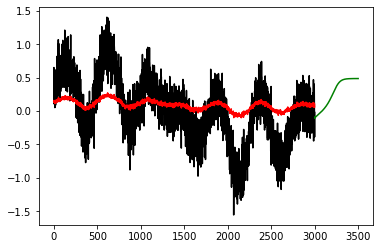

In [14]:
#RNN
train_inout_seq = new_datasets[-1][:3000]
length = len(train_inout_seq)
currentSeq=train_inout_seq[-1][0].tolist()
extra_rnn=[]
for i in range(500):
    e=rnn_model(torch.Tensor(currentSeq).reshape(1,ws,1))
    extra_rnn.append(float(e))
    currentSeq.pop(0)
    currentSeq.append(float(e))
plot(expectation,'k')
plot(result,'r')
plot(range(length,length+500),torch.Tensor(extra_rnn).detach().numpy(),'g')

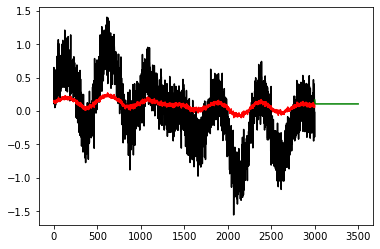

In [15]:
#LSTM
extra_lstm=[]
for i in range(500):
    model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
    e=lstm_model(torch.Tensor(currentSeq).reshape(ws,1,1))
    extra_lstm.append(e)
    currentSeq.pop(0)
    currentSeq.append(float(e))
    #print(currentSeq)
plot(expectation,'k')
plot(result,'r')
plot(range(length,length+500),torch.Tensor(extra_lstm).detach().numpy(),'g')

For the created models with RNN and LSTM, the prediction horizon was almost similar for both the models with LSTM performing slightly better that RNN. It is because LSTM is able to retain the information for longer time while processing the data in later epochs, but RNN mostly uses only the recent data and there by predicts less accurate values. 
For the above execution to predict the next 500 points, I consider LSTM is performing better as the curve tends to be similar to the predicted values. Since we ran with fewer epochs the model hasnt learned better when compared to higher window size so we see higher fluctioations for 300 window size in both RNN and LSTM.